In [1]:
import sqlite3
import pandas as pd

In [8]:
consumption_df = pd.read_csv('../Resources/Natural_Gas_Consumption_Data.csv')
AQI_df = pd.read_csv('../Resources/US_AQI.csv', index_col=0)

In [12]:
consumption_df.head()

,year,month,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2014,1,SFL,FLORIDA,EPG0,Natural Gas,VCS,Commercial Consumption,N3020FL2,Natural Gas Deliveries to Commercial Consumers...,6605.0,MMCF
1,2014,1,SNH,USA-NH,EPG0,Natural Gas,VCS,Commercial Consumption,N3020NH2,Natural Gas Deliveries to Commercial Consumers...,1691.0,MMCF
2,2014,1,SOR,USA-OR,EPG0,Natural Gas,VCS,Commercial Consumption,N3020OR2,Natural Gas Deliveries to Commercial Consumers...,4711.0,MMCF
3,2014,1,SDE,USA-DE,EPG0,Natural Gas,VCS,Commercial Consumption,N3020DE2,Natural Gas Deliveries to Commercial Consumers...,2128.0,MMCF
4,2014,1,SAZ,USA-AZ,EPG0,Natural Gas,VCS,Commercial Consumption,N3020AZ2,Natural Gas Deliveries to Commercial Consumers...,3915.0,MMCF


In [10]:
AQI_df.head()

,CBSA Code,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_id,state_name,lat,lng,population,density,timezone
0,10140,2022-01-01,21,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
1,10140,2022-01-02,12,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
2,10140,2022-01-03,18,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
3,10140,2022-01-04,19,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
4,10140,2022-01-05,17,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles


In [13]:
AQI_df.shape

(5617325, 14)

In [20]:
AQI_df.Date.str.replace('-.+','',regex=True).unique()

array(['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015',
       '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007',
       '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999',
       '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991',
       '1990', '1989', '1988', '1987', '1986', '1985', '1984', '1983',
       '1982', '1981', '1980'], dtype=object)

In [22]:
AQI_df.Date = pd.to_datetime(AQI_df.Date)

In [27]:
df = AQI_df[(AQI_df.Date>='2020-01-01')&(AQI_df.Date<='2021-12-31')]
print(df.shape)
df[:5]

(333485, 14)


,CBSA Code,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_id,state_name,lat,lng,population,density,timezone
26065,10100,2021-01-01,43,Good,PM2.5,1,Aberdeen,SD,South Dakota,45.4649,-98.4686,28315.0,661.0,America/Chicago
26066,10100,2021-01-02,35,Good,PM2.5,1,Aberdeen,SD,South Dakota,45.4649,-98.4686,28315.0,661.0,America/Chicago
26067,10100,2021-01-03,55,Moderate,PM2.5,1,Aberdeen,SD,South Dakota,45.4649,-98.4686,28315.0,661.0,America/Chicago
26068,10100,2021-01-04,7,Good,PM2.5,1,Aberdeen,SD,South Dakota,45.4649,-98.4686,28315.0,661.0,America/Chicago
26069,10100,2021-01-05,12,Good,PM2.5,1,Aberdeen,SD,South Dakota,45.4649,-98.4686,28315.0,661.0,America/Chicago


In [28]:
df.to_csv('new_AQI.csv')

In [2]:
df = pd.read_csv('../Resources/new_AQI.csv')

In [4]:
df.set_index('Date',inplace=True)

In [5]:
df[:5]

,Unnamed: 0,CBSA Code,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_id,state_name,lat,lng,population,density,timezone
Date,,,,,,,,,,,,,,
2021-01-01,26065,10100,43,Good,PM2.5,1,Aberdeen,SD,South Dakota,45.4649,-98.4686,28315.0,661.0,America/Chicago
2021-01-02,26066,10100,35,Good,PM2.5,1,Aberdeen,SD,South Dakota,45.4649,-98.4686,28315.0,661.0,America/Chicago
2021-01-03,26067,10100,55,Moderate,PM2.5,1,Aberdeen,SD,South Dakota,45.4649,-98.4686,28315.0,661.0,America/Chicago
2021-01-04,26068,10100,7,Good,PM2.5,1,Aberdeen,SD,South Dakota,45.4649,-98.4686,28315.0,661.0,America/Chicago
2021-01-05,26069,10100,12,Good,PM2.5,1,Aberdeen,SD,South Dakota,45.4649,-98.4686,28315.0,661.0,America/Chicago


In [8]:
df

,Unnamed: 0,CBSA Code,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_id,state_name,lat,lng,population,density,timezone
Date,,,,,,,,,,,,,,
2021-01-01,26065,10100,43,Good,PM2.5,1,Aberdeen,SD,South Dakota,45.4649,-98.4686,28315.0,661.0,America/Chicago
2021-01-02,26066,10100,35,Good,PM2.5,1,Aberdeen,SD,South Dakota,45.4649,-98.4686,28315.0,661.0,America/Chicago
2021-01-03,26067,10100,55,Moderate,PM2.5,1,Aberdeen,SD,South Dakota,45.4649,-98.4686,28315.0,661.0,America/Chicago
2021-01-04,26068,10100,7,Good,PM2.5,1,Aberdeen,SD,South Dakota,45.4649,-98.4686,28315.0,661.0,America/Chicago
2021-01-05,26069,10100,12,Good,PM2.5,1,Aberdeen,SD,South Dakota,45.4649,-98.4686,28315.0,661.0,America/Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,365463,49740,32,Good,Ozone,1,Yuma,AZ,Arizona,32.5995,-114.5491,137612.0,311.0,America/Phoenix
2020-12-28,365464,49740,44,Good,PM10,1,Yuma,AZ,Arizona,32.5995,-114.5491,137612.0,311.0,America/Phoenix
2020-12-29,365465,49740,38,Good,Ozone,1,Yuma,AZ,Arizona,32.5995,-114.5491,137612.0,311.0,America/Phoenix


In [14]:
df[df.index>'2020-12-31'].to_csv('../Resources/AQI.csv')

In [3]:
df.shape

(166633, 14)

In [11]:
df = pd.read_csv('../Resources/AQI.csv', index_col=0).drop('Unnamed:0', axis=1)
df[:5]

KeyError: "['Unnamed:0'] not found in axis"

<Axes: xlabel='Date'>

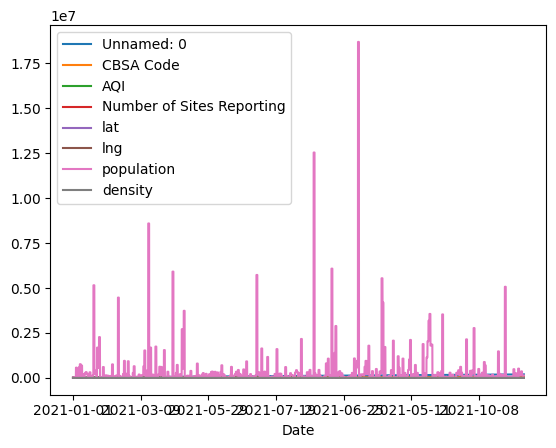

In [8]:
df.plot()